<br><br>
<font size='6'><b>Autoencoder
</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

Table of Contents
<div id="toc"></div>

# 1. Unsupervised Learning

<br>

__Definition__

- Unsupervised learning refers to most attempts to extract information from a distribution that do not require human labor to annotate example
- Main task is to find the 'best' representation of the data

__Dimension Reduction__
- Attempt to compress as much information as possible in a smaller representation
- Preserve as much information as possible while obeying some constraint aimed at keeping the representation simpler

# 2. Autoencoders


It is like 'deep learning version' of unsupervised learning.


<br>

__Definition__

- An autoencoder is a neural network that is trained to attempt to copy its input to its output
- The network consists of two parts: an __encoder__ and a __decoder__ that produce a reconstruction


<br>

__Encoder and Decoder__

- Encoder function : $z = f(x)$
- Decoder function : $x = g(z)$
- We learn to set $g\left(f(x)\right) = x$

<br>
<center><img src="./image_files/autoencoder_before.png" width = 600></center>
<br>

<br>
<center><img src="./image_files/autoencoder.png" width = 600></center>
<br>

- Autoencoder combines an encoder $f$ from the original space $\mathscr{X}$ to a latent space $\mathscr{F}$, and a decoder $g$ to map back to $\mathscr{X}$, such that $f \circ g$ is [close to] the identity on the data

<br>
$$ \mathbb{E} \left[ \lVert X - g \circ f(X) \rVert^2 \right] \approx 0$$

<br>
<center><img src="./image_files/fg_map.png" width = 500></center>
<br>

- A proper autoencoder has to capture a "good" parametrization of the signal, and in particular the statistical dependencies between the signal components.

# 3. Autoencoder with TensorFlow

- MNIST example


- Use only (1, 5, 6) digits to visualize in 2-D


<br>
<center><img src="./image_files/autoencoder4.png" width = 600></center>

<br>
<center><img src="./image_files/AE_arch2.png" width = 800></center>

In [1]:
!nvidia-smi

Mon Apr 26 22:49:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 440.82       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:03:00.0  On |                  N/A |
| 23%   42C    P8    12W / 250W |  10683MiB / 11175MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:04:00.0 Off |                  N/A |
| 29%   34C    P8     9W / 250W |    284MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

## 3.1. Import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

## 3.2. Load MNIST Data

In [4]:
# Load Data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0],28*28)) / 255
x_test = x_test.reshape((x_test.shape[0],28*28)) / 255

- Only use (1, 5, 6) digits to visualize latent space in 2-D

In [5]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [6]:
# Use Only 1,5,6 Digits to Visualize

train_idx1 = np.array(np.where(y_train == 1))
train_idx5 = np.array(np.where(y_train == 5))
train_idx6 = np.array(np.where(y_train == 6))
train_idx = np.sort(np.concatenate((train_idx1, train_idx5, train_idx6), axis= None))

test_idx1 = np.array(np.where(y_test == 1))
test_idx5 = np.array(np.where(y_test == 5))
test_idx6 = np.array(np.where(y_test == 6))
test_idx = np.sort(np.concatenate((test_idx1, test_idx5, test_idx6), axis= None))

train_imgs = x_train[train_idx]
train_labels = y_train[train_idx]
test_imgs = x_test[test_idx]
test_labels = y_test[test_idx]
n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_imgs.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_imgs.shape))

The number of training images : 18081, shape : (18081, 784)
The number of testing images : 2985, shape : (2985, 784)


## 3.3. Define a Structure of an Autoencoder
- Input shape and latent variable shape
- Encoder shape
- Decoder shape

<br>
<center><img src="./image_files/AE_arch2.png" width = 700></center>

## 3.4. Define Weights, Biases, and Placeholder
- Define weights and biases for encoder and decoder, separately
- Based on the pre-defined layer size
- Initialize with normal distribution of $\mu=0$ and $\sigma=0.1$

## 3.5. Build a Model

__Encoder__
- Simple ANN (MLP) model
- Use `relu` for a nonlinear activation function
- `latent` is not applied with a nonlinear activation function

__Decoder__
- Simple ANN (MLP) model
- Use `relu` for a nonlinear activation function
- `reconst` is not applied with a nonlinear activation function

<br>
<img src="./image_files/autoencoder4.png" width = 600>

Define model parameters

In [7]:
# Define Structure
'''
<Encoder Structure>
encoder = ?

<Decoder Structure>
decoder = ?

<Autoencoder = Encoder + Decoder>
autoencoder = ?
(Hint : use Sequential)
'''
encoder = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape = (784)),
        tf.keras.layers.Dense(500, activation = 'relu'),
        tf.keras.layers.Dense(300, activation = 'relu'),
        tf.keras.layers.Dense(2)
        ])

decoder = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape = (2)),
        tf.keras.layers.Dense(300, activation = 'relu'),
        tf.keras.layers.Dense(500, activation = 'relu'),
        tf.keras.layers.Dense(784)
        ])

autoencoder = tf.keras.models.Sequential([encoder, decoder])

## 3.6. Define Loss and Optimizer

__Loss__

- Squared loss


$$  \frac{1}{m}\sum_{i=1}^{m} (t_{i} - y_{i})^2 $$


__Optimizer__

- AdamOptimizer: the most popular optimizer

In [8]:
'''
Model compile
(Adam optimizer, mean_squared_err, metrics : mse)
'''

# adam optimizer, cross entropy
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
                    loss = 'mean_squared_error',
                    metrics = ['mse'])

## 3.7.  Define Optimization Configuration and Then Optimize


<br><br>
<center><img src="./image_files/AE_summary_of_model.png" width = 500></center>

- Define parameters for training autoencoder
     - `n_batch` : batch size for mini-batch gradient descent
     - `n_iter` : the number of iteration steps
     - `n_epoch`: iteration over the entire x and y data provided

In [9]:
# Train Model & Evaluate Test Data

n_batch = 50
n_iter = train_imgs.shape[0]/n_batch 
# batch가 몇번 돌면서 step이 되는지,  8000을 50개로 나눈게 몇번인지
n_epoch = 10

'''
모델 학습

training = 
'''
training = autoencoder.fit(train_imgs, train_imgs, batch_size = n_batch, epochs = n_epoch)

Epoch 1/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0370 - mse: 0.0370
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0304 - mse: 0.0304
Epoch 3/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0290 - mse: 0.0290
Epoch 4/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0281 - mse: 0.0281
Epoch 5/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0275 - mse: 0.0275
Epoch 6/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0271 - mse: 0.0271
Epoch 7/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0268 - mse: 0.0268
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0265 - mse: 0.0265
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0262 - mse: 0.0262
Epoch 10/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0260 - mse: 0.0260


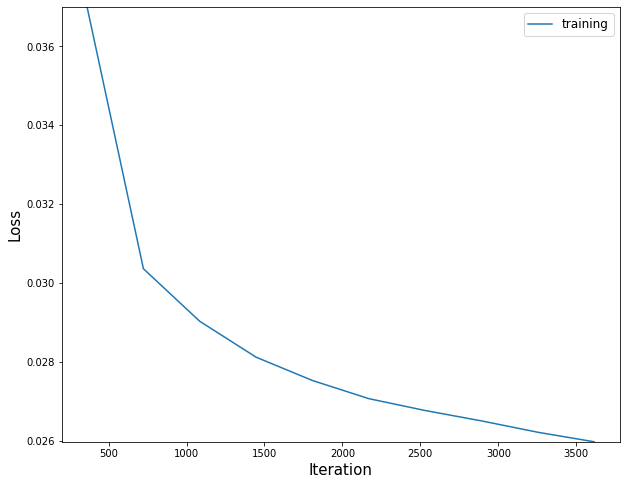

In [10]:
plt.figure(figsize=(10,8))
plt.plot((np.arange(n_epoch)+1)*n_iter, training.history['loss'], label = 'training')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend(fontsize = 12)
plt.ylim([np.min(training.history['loss']), np.max(training.history['loss'])])
plt.show()

In [11]:
'''
print test_scores


test_scores = 
print('Test loss: {}'.format()
print('Mean Squared Error: {} %'.format()

'''
test_scores = autoencoder.evaluate(test_imgs, test_imgs)
print('Test loss: {}'.format(test_scores[0]))
print('Mean Squared Error: {} %'.format(test_scores[1]))

94/94 [==============================] - 0s 2ms/step - loss: 0.0265 - mse: 0.0265
Test loss: 0.026501839980483055
Mean Squared Error: 0.026501839980483055 %


## 3.8. Test or Evaluate
- Test reconstruction performance of the autoencoder

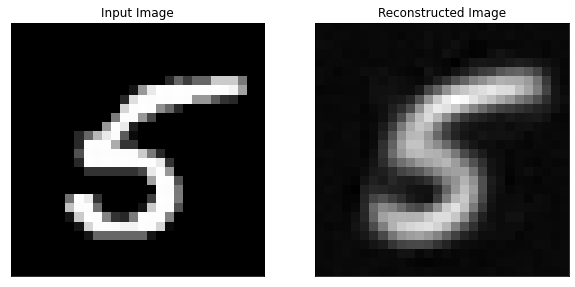

In [12]:
# Visualize Evaluation on Test Data

rand_idx = np.random.randint(1, test_imgs.shape[0]+1)

test_img = test_imgs[rand_idx]
reconst_img = autoencoder.predict(test_img.reshape(1,28*28))

plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28,28), 'gray')
plt.title('Input Image', fontsize = 12)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(reconst_img.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 12)
plt.xticks([])
plt.yticks([])

plt.show()

__Data Generation__

- It generates something that makes sense.

- These results are unsatisfying, because the density model used on the latent space ℱ is too simple and inadequate.

- Building a “good” model amounts to our original problem of modeling an empirical distribution, although it may now be in a lower dimension space.

- This is a motivation to VAE or GAN.


# 4. Visualization

__Image Generation__

- Select an arbitrary latent varibale $z$
- Generate images using the learned decoder

In [13]:
test_imgs.shape

(2985, 784)

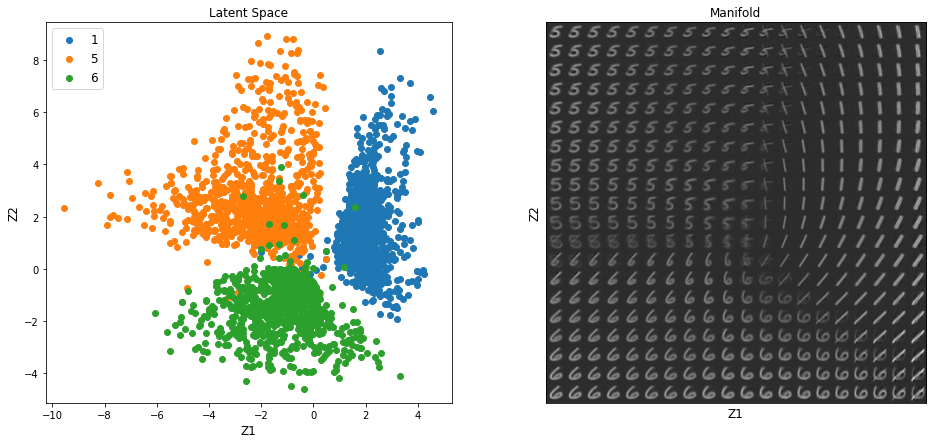

In [14]:
# Visualize Latent Space

'''
latent : Test image를 encoder에 넣어서 만든 latent vector
reconst : latent를 다시 decoder에 넣어서 만든 reconstructed image 

latent = ?
reconst = ?
'''
latent = encoder.predict(test_imgs)
reconst = decoder.predict(latent)

# Initialize Canvas
nx = 20
ny = 20
x_values = np.linspace(-5, 5, nx)
y_values = np.linspace(-5, 8, ny)
canvas = np.empty((28*ny, 28*nx))

for i, yi in enumerate(y_values):
        for j, xi in enumerate(x_values):
            latent_coordinates_ = np.array([[xi, yi]])
            reconst_from_latent_ = decoder.predict(latent_coordinates_)
            canvas[(nx-i-1)*28:(nx-i)*28,j*28:(j+1)*28] = reconst_from_latent_.reshape(28, 28)

plt.figure(figsize = (16, 7))
plt.subplot(1,2,1)
plt.scatter(latent[test_labels == 1,0], latent[test_labels == 1,1], label = '1')
plt.scatter(latent[test_labels == 5,0], latent[test_labels == 5,1], label = '5')
plt.scatter(latent[test_labels == 6,0], latent[test_labels == 6,1], label = '6')
plt.title('Latent Space', fontsize = 12)
plt.xlabel('Z1', fontsize = 12)
plt.ylabel('Z2', fontsize = 12)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(canvas, 'gray')
plt.title('Manifold', fontsize = 12)
plt.xlabel('Z1', fontsize = 12)
plt.ylabel('Z2', fontsize = 12)
plt.xticks([])
plt.yticks([])
plt.show()

__Data Generation__

- It generates something that makes sense.

- These results are unsatisfying, because the density model used on the latent space ℱ is too simple and inadequate.

- Building a “good” model amounts to our original problem of modeling an empirical distribution, although it may now be in a lower dimension space.

- This is a motivation to VAE or GAN.

In [15]:
idx = np.random.randint(0, len(test_labels), 500)
test_x, test_y = test_imgs[idx], test_labels[idx]

In [16]:
test_latent = encoder.predict(test_x)

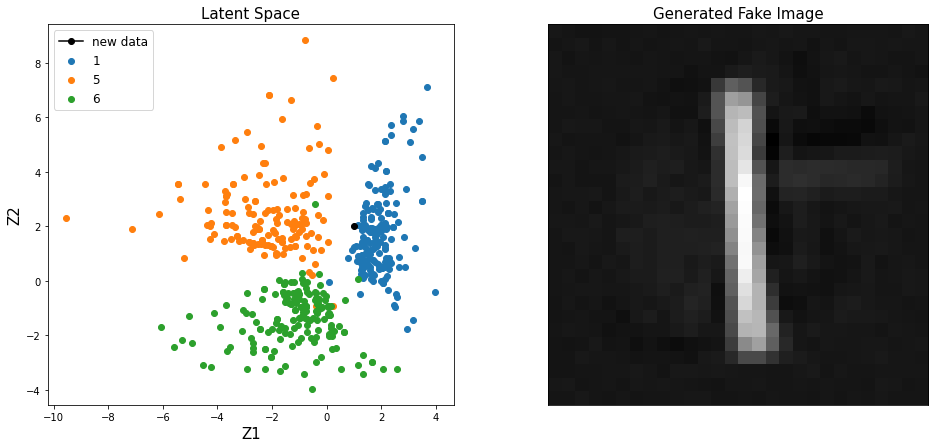

In [17]:
'''
<Data generation in latent space>

new_data = ?

fake_image = ?

'''
new_data = np.array([[1, 2]])

fake_image = decoder.predict(new_data)

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')

'''
new data point plot 해보기
'''
plt.plot(new_data[:, 0], new_data[:, 1], c ='k', marker='o', label='new data')

plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(fake_image.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()